In [308]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [309]:
pwd = os.getcwd()
filepath = pwd + "\\skater_stats.csv"
data = pd.read_csv(filepath,encoding='latin-1')

C:\Users\krist\AppData\Local\Temp\ipykernel_8008\4019381976.py:3: DtypeWarning: Columns (8,9,11,29,48,49,55,56,59,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath,encoding='latin-1')


In [310]:
# Shape of the current dataset.
data.shape

(71251, 90)

In [311]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [312]:
# Displaying top 5 results by index.
data.head()

,Season,Game_Type,Player_ID,Player_Name,Hof,Age,Team_ID,Team_Name,Team_Bkdwn_Flag,Seas_Sum_Flag,Pos1,Pos2,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,S_Pct,TOI,Avg_TOI,BLK,HIT,FOW,FOL,FO_Pct,esCF,esCA,esCF_Pct,esRelCF_Pct,esFF,esFA,esFF_Pct,esRelFF_Pct,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TOI_per60,esTOI_per60,TK,GV,xPlusMinus,TSA,SAThruToNet_Pct,Avg_ShiftLength_perGm,esTOI_perGm,esGF_per60,esGA_per60,ppTOI_perGm,ppRelCF_Pct,ppGF_per60,ppGA_per60,shTOI_perGm,shRelCF_Pct,shGF_per60,shGA_per60,GC,G_perGm,A_perGm,PTS_perGm,GC_perGm,PIM_perGm,S_perGm,adjG,adjA,adjPTS,adjGC,oiTGF,oiPPGF,oiTGA,oiPKGA,xGF,xGA,OPS,DPS,soAtt,soMade,soMiss,soPct
0,1918,REG,adamsja01,Jack Adams,True,23,TRA,Toronto Arenas,False,False,C,NaN,8.0,0,0,0,NaN,31.0,-0.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,3.88,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,0.2,NaN,NaN,NaN,NaN
1,1918,REG,bellbi01,Billy Bell,False,26,TOT,Total,False,True,F,NaN,9.0,1,0,1,NaN,6.0,-0.3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.11,0.00,0.11,0.10,0.67,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,0.3,NaN,NaN,NaN,NaN
2,1918,REG,bellbi01,Billy Bell,False,26,MTL,Montreal Canadiens,True,False,F,NaN,7.0,0,0,0,NaN,6.0,-0.3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.86,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,0.3,NaN,NaN,NaN,NaN
3,1918,REG,bellbi01,Billy Bell,False,26,MTW,Montreal Wanderers,True,False,F,NaN,2.0,1,0,1,NaN,0.0,0.1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.50,0.00,0.50,0.45,0.00,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.1,NaN,NaN,NaN,NaN
4,1918,REG,berlilo01,Louis Berlinguette,False,30,MTL,Montreal Canadiens,False,False,LW,NaN,20.0,2,1,3,NaN,12.0,-0.5,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.10,0.05,0.15,0.11,0.60,NaN,2.0,5.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.3,0.8,NaN,NaN,NaN,NaN


In [313]:
# In this analysis I´m mostly interested in regular season games played between seasons 2015-2022 with minimum 20 games played per player.
data = data[(data["Season"] >= 2015) & (data["Game_Type"] == "REG") & (data["GP"] >= 5)]

In [314]:
data = data.reset_index(drop=True)

In [315]:
data.head()

,Season,Game_Type,Player_ID,Player_Name,Hof,Age,Team_ID,Team_Name,Team_Bkdwn_Flag,Seas_Sum_Flag,Pos1,Pos2,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,S_Pct,TOI,Avg_TOI,BLK,HIT,FOW,FOL,FO_Pct,esCF,esCA,esCF_Pct,esRelCF_Pct,esFF,esFA,esFF_Pct,esRelFF_Pct,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TOI_per60,esTOI_per60,TK,GV,xPlusMinus,TSA,SAThruToNet_Pct,Avg_ShiftLength_perGm,esTOI_perGm,esGF_per60,esGA_per60,ppTOI_perGm,ppRelCF_Pct,ppGF_per60,ppGA_per60,shTOI_perGm,shRelCF_Pct,shGF_per60,shGA_per60,GC,G_perGm,A_perGm,PTS_perGm,GC_perGm,PIM_perGm,S_perGm,adjG,adjA,adjPTS,adjGC,oiTGF,oiPPGF,oiTGA,oiPKGA,xGF,xGA,OPS,DPS,soAtt,soMade,soMiss,soPct
0,2015,REG,abdelju01,Justin Abdelkader,False,27,DET,Detroit Red Wings,False,False,LW,NaN,71.0,23,21,44,3.0,72.0,5.6,15.0,8.0,0.0,5.0,15.0,6.0,0.0,154.0,14.9,1272.0,17:55,28.0,153.0,7.0,8.0,46.7,909.0,704.0,56.4,4.0,668.0,540.0,55.3,4.1,9.7,90.5,100.2,63.6,36.4,17:55,14:10,16.0,29.0,9.7,237.0,65.0,0:38,14:09,2.9,2.3,2:48,-2.2,9.7,2.1,0:56,1.9,0.0,4.5,18.0,0.32,0.30,0.62,0.25,1.01,2.17,26.0,23.0,49.0,20.0,80.0,32.0,50.0,5.0,39.1,29.3,4.0,1.6,0.0,NaN,NaN,NaN
1,2015,REG,adamscr01,Craig Adams,False,37,PIT,Pittsburgh Penguins,False,False,RW,NaN,70.0,1,6,7,-1.0,44.0,-0.3,1.0,0.0,0.0,1.0,5.0,0.0,1.0,51.0,2.0,682.0,9:45,29.0,183.0,17.0,23.0,42.5,363.0,396.0,47.8,-6.3,268.0,292.0,47.9,-6.6,5.6,93.7,99.2,50.0,50.0,9:45,7:10,6.0,7.0,-3.4,76.0,67.1,0:28,7:09,1.3,1.6,0:02,11.8,0.0,0.0,2:33,-1.4,0.7,5.0,2.0,0.01,0.09,0.10,0.03,0.63,0.73,1.0,7.0,8.0,2.0,13.0,0.0,28.0,15.0,14.6,18.0,-1.0,0.8,0.0,NaN,NaN,NaN
2,2015,REG,akesoja01,Jason Akeson,False,24,PHI,Philadelphia Flyers,False,False,RW,NaN,13.0,0,0,0,-1.0,8.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,105.0,8:03,4.0,11.0,1.0,1.0,50.0,71.0,114.0,38.4,-9.5,53.0,82.0,39.3,-9.1,2.6,96.9,99.4,50.0,50.0,8:03,7:49,1.0,3.0,-2.1,20.0,45.0,0:37,7:48,0.6,1.2,0:13,-11.3,0.0,0.0,0:00,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.62,0.69,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.2,4.3,-0.3,0.1,0.0,NaN,NaN,NaN
3,2015,REG,allenbr01,Bryan Allen,False,34,TOT,Total,False,True,D,NaN,11.0,0,2,2,-2.0,6.0,0.2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,173.0,15:43,15.0,20.0,0.0,0.0,NaN,157.0,137.0,53.4,-2.2,109.0,103.0,51.4,-2.5,7.7,90.3,98.0,45.2,54.8,15:43,13:46,0.0,8.0,0.8,NaN,NaN,0:44,14:17,2.5,2.5,0:00,NaN,NaN,NaN,1:26,-28.2,0.0,13.3,1.0,0.00,0.18,0.18,0.05,0.55,0.55,0.0,2.0,2.0,1.0,5.0,0.0,9.0,2.0,5.1,4.3,0.0,0.2,0.0,NaN,NaN,NaN
4,2015,REG,allenbr01,Bryan Allen,False,34,ANA,Anaheim Ducks,True,False,D,NaN,6.0,0,1,1,0.0,4.0,0.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,109.0,18:13,10.0,11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.17,0.17,0.05,0.67,0.67,0.0,1.0,1.0,0.0,4.0,0.0,6.0,2.0,3.3,2.6,0.0,0.2,0.0,NaN,NaN,NaN


In [316]:
# Displaying columns of the dataset.
data.columns

Index(['Season', 'Game_Type', 'Player_ID', 'Player_Name', 'Hof', 'Age',
       'Team_ID', 'Team_Name', 'Team_Bkdwn_Flag', 'Seas_Sum_Flag', 'Pos1',
       'Pos2', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM', 'PS', 'esG', 'ppG',
       'shG', 'GWG', 'esA', 'ppA', 'shA', 'S', 'S_Pct', 'TOI', 'Avg_TOI',
       'BLK', 'HIT', 'FOW', 'FOL', 'FO_Pct', 'esCF', 'esCA', 'esCF_Pct',
       'esRelCF_Pct', 'esFF', 'esFA', 'esFF_Pct', 'esRelFF_Pct', 'oiSH_Pct',
       'oiSV_Pct', 'PDO', 'oZS_Pct', 'dZS_Pct', 'TOI_per60', 'esTOI_per60',
       'TK', 'GV', 'xPlusMinus', 'TSA', 'SAThruToNet_Pct',
       'Avg_ShiftLength_perGm', 'esTOI_perGm', 'esGF_per60', 'esGA_per60',
       'ppTOI_perGm', 'ppRelCF_Pct', 'ppGF_per60', 'ppGA_per60', 'shTOI_perGm',
       'shRelCF_Pct', 'shGF_per60', 'shGA_per60', 'GC', 'G_perGm', 'A_perGm',
       'PTS_perGm', 'GC_perGm', 'PIM_perGm', 'S_perGm', 'adjG', 'adjA',
       'adjPTS', 'adjGC', 'oiTGF', 'oiPPGF', 'oiTGA', 'oiPKGA', 'xGF', 'xGA',
       'OPS', 'DPS', 'soAtt', 'so

In [317]:
# Sorting the columns I´m interested in.
data = data[['Season','Player_Name','Age',
       'Team_ID', 'Team_Name','Pos1','GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM','PS', 'esG', 'ppG',
       'shG', 'GWG', 'esA', 'ppA', 'shA', 'S', 'TOI', 'Avg_TOI','BLK', 'HIT',  'FOW', 'FOL','xGF', 'xGA',]]

In [318]:
# Changing the name of column Pos1 to Pos (as Position).
data.rename(columns={"Pos1":"Pos"}, inplace=True)

In [319]:
# Checking for null values.
data.isna().sum()

Season          0
Player_Name     0
Age             0
Team_ID         0
Team_Name      33
Pos             0
GP              0
G               0
A               0
PTS             0
PlusMinus       0
PIM             0
PS              0
esG             0
ppG             0
shG             0
GWG             0
esA             0
ppA             0
shA             0
S               0
TOI             0
Avg_TOI         0
BLK             0
HIT             0
FOW             0
FOL             0
xGF             0
xGA             0
dtype: int64

In [320]:
# Checking which Team_Name has null values.
data["Team_ID"][data["Team_Name"].isna()].unique()

array(['SEA'], dtype=object)

In [321]:
# Assigning Team_Name based on Team_ID.
data["Team_Name"].fillna("Seattle Kraken", inplace=True)

In [322]:
print("Dataset shape = {}\n".format(data.shape))
data.info()

Dataset shape = (7569, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7569 entries, 0 to 7568
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       7569 non-null   int64  
 1   Player_Name  7569 non-null   object 
 2   Age          7569 non-null   int64  
 3   Team_ID      7569 non-null   object 
 4   Team_Name    7569 non-null   object 
 5   Pos          7569 non-null   object 
 6   GP           7569 non-null   float64
 7   G            7569 non-null   int64  
 8   A            7569 non-null   int64  
 9   PTS          7569 non-null   int64  
 10  PlusMinus    7569 non-null   float64
 11  PIM          7569 non-null   float64
 12  PS           7569 non-null   float64
 13  esG          7569 non-null   float64
 14  ppG          7569 non-null   float64
 15  shG          7569 non-null   float64
 16  GWG          7569 non-null   float64
 17  esA          7569 non-null   float64
 18  ppA          7569 no

In [323]:
# Basic descriptive statistics of the numeric columns.
data.describe()

,Season,Age,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,BLK,HIT,FOW,FOL,xGF,xGA
count,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000
mean,2018.549478,26.591492,48.821641,7.671687,12.894438,20.566125,-0.652530,23.461752,2.424983,5.912010,1.547100,0.212578,1.209275,9.729951,2.941736,0.222751,82.842648,801.077553,37.835910,61.638261,78.718325,78.779099,27.147377,27.128788
std,2.309088,4.249936,25.393081,8.547291,12.675807,19.916114,10.191624,22.005709,2.656298,6.237349,2.777597,0.601373,1.740442,8.559949,4.937068,0.554441,65.360504,515.719226,37.131046,51.870602,171.747200,160.595730,18.382083,17.267992
min,2015.000000,18.000000,5.000000,0.000000,0.000000,0.000000,-47.000000,0.000000,-1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.400000
25%,2017.000000,23.000000,24.000000,1.000000,3.000000,5.000000,-6.000000,8.000000,0.300000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,27.000000,323.000000,12.000000,22.000000,0.000000,0.000000,10.500000,11.500000
50%,2019.000000,26.000000,54.000000,5.000000,9.000000,14.000000,-1.000000,18.000000,1.600000,4.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,70.000000,790.000000,26.000000,48.000000,2.000000,4.000000,25.600000,26.500000
75%,2021.000000,29.000000,72.000000,11.000000,19.000000,31.000000,4.000000,33.000000,3.800000,9.000000,2.000000,0.000000,2.000000,15.000000,4.000000,0.000000,123.000000,1214.000000,50.000000,87.000000,45.000000,54.000000,41.400000,40.500000
max,2022.000000,45.000000,84.000000,60.000000,87.000000,128.000000,64.000000,238.000000,15.300000,44.000000,26.000000,7.000000,12.000000,56.000000,34.000000,6.000000,398.000000,2378.000000,283.000000,382.000000,1273.000000,935.000000,86.800000,82.200000


In [324]:
# Checking unique values in column Games played. Regular season in NHL has 82 games, this dataset has players that played more than that.
data["GP"].unique()

array([71., 70., 13., 11.,  6.,  5., 82., 68., 18., 12., 52., 77., 36.,
       27., 10.,  7., 78., 31., 80., 15., 14., 47., 37., 62., 64., 65.,
       49., 81., 73., 59., 56., 39., 17., 67.,  9., 60., 72., 45., 41.,
       21., 53., 75., 63., 51., 38., 29., 69., 30.,  8., 44., 57., 20.,
       33., 19., 16., 40., 76., 61., 58., 74., 24., 43., 54., 55., 50.,
       32., 23., 35., 79., 42., 26., 66., 34., 25., 48., 46., 22., 28.,
       84., 83.])

In [325]:
# Looking for players that played more than 82 games, the problem was with players that were traded during the regular season and their stats from multiple teams were summed together in a new row.
data[data["GP"] > 82]

,Season,Player_Name,Age,Team_ID,Team_Name,Pos,GP,G,A,PTS,PlusMinus,PIM,PS,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,Avg_TOI,BLK,HIT,FOW,FOL,xGF,xGA
926,2015,Keith Yandle,28,TOT,Total,D,84.0,6,46,52,-26.0,40.0,6.6,4.0,2.0,0.0,2.0,19.0,27.0,0.0,232.0,1925.0,22:55,101.0,53.0,0.0,0.0,59.2,70.1
933,2015,Marek Zidlicky,37,TOT,Total,D,84.0,7,27,34,-9.0,56.0,6.0,1.0,6.0,0.0,1.0,13.0,14.0,0.0,130.0,1760.0,20:57,92.0,95.0,0.0,1.0,54.1,60.8
1474,2016,Jamie McGinn,27,TOT,Total,LW,84.0,22,17,39,-7.0,33.0,5.0,13.0,9.0,0.0,5.0,14.0,3.0,0.0,156.0,1201.0,14:18,27.0,164.0,4.0,3.0,34.7,33.9
1736,2016,Eric Staal,31,TOT,Total,C,83.0,13,26,39,-3.0,34.0,3.4,12.0,1.0,0.0,0.0,20.0,6.0,0.0,199.0,1540.0,18:33,33.0,74.0,446.0,396.0,58.7,46.5
3979,2019,Kevin Fiala,22,TOT,Total,LW,83.0,13,26,39,-23.0,36.0,2.4,11.0,2.0,0.0,2.0,17.0,9.0,0.0,174.0,1298.0,15:38,20.0,42.0,3.0,5.0,49.6,52.2
4084,2019,Ryan Hartman,24,TOT,Total,RW,83.0,12,14,26,1.0,74.0,2.1,12.0,0.0,0.0,2.0,14.0,0.0,0.0,145.0,1089.0,13:07,39.0,107.0,4.0,12.0,41.6,48.7
4427,2019,Marcus Pettersson,22,TOT,Total,D,84.0,2,23,25,17.0,66.0,5.0,1.0,1.0,0.0,0.0,18.0,4.0,1.0,87.0,1401.0,16:41,108.0,101.0,1.0,0.0,52.6,48.0


In [326]:
# Team_ID with value TOT means Season Total for players that were traded during the season. I want to delete those rows as we have their separate stats in other rows for that particular season.
data = data[data["Team_ID"] != "TOT"]

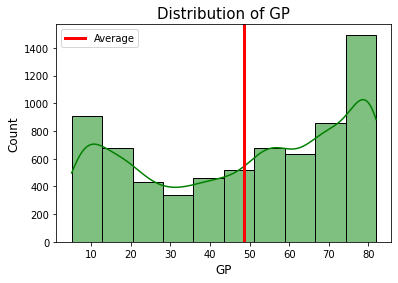

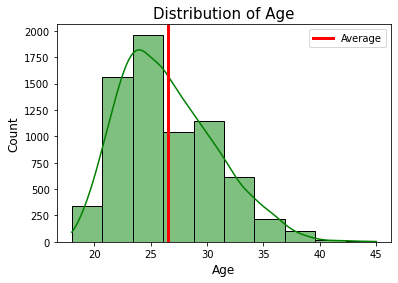

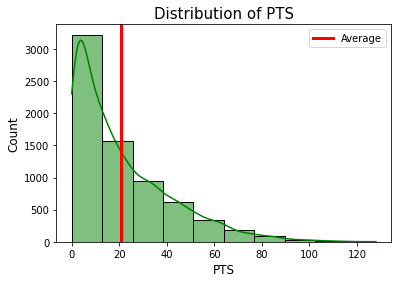

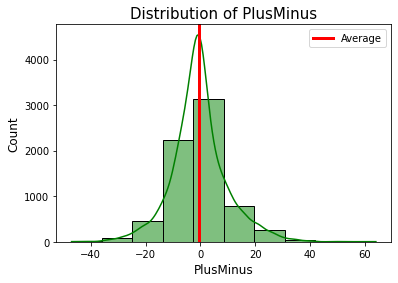

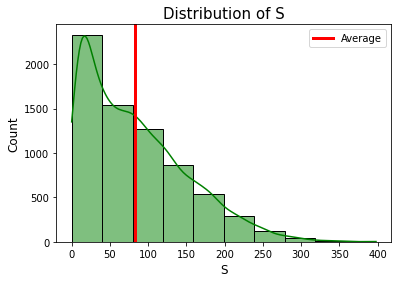

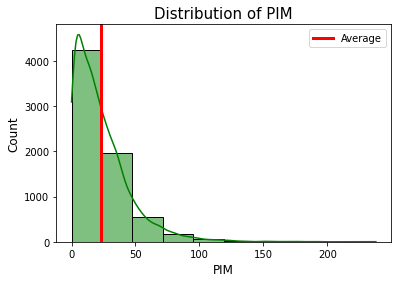

In [327]:
# Looking at the distribution of the dataset.
xd = ["GP","Age","PTS","PlusMinus","S","PIM"]
for i in xd:
    sns.histplot(x=i, data=data, color="g", kde=True, bins=10)
    plt.title("Distribution of " + i, fontsize=15)
    plt.xlabel(i, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.axvline(data[i].mean(), linewidth=3, c="r", label="Average")
    plt.legend()
    plt.show()

In [328]:
# Quick stats of the last 7 seasons.
print("Most goals scored during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"G":"sum"}).sort_values(by="G", ascending=False).head(1), "\n")
print("Most game-winning goals scored during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"GWG":"sum"}).sort_values(by="GWG", ascending=False).head(1), "\n")
print("Most assists during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"A":"sum"}).sort_values(by="A", ascending=False).head(1), "\n")
print("Most points during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"PTS":"sum"}).sort_values(by="PTS", ascending=False).head(1), "\n")
print("Most shots during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"S":"sum"}).sort_values(by="S", ascending=False).head(1), "\n")
print("Most hits during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"HIT":"sum"}).sort_values(by="HIT", ascending=False).head(1), "\n")
print("Most penalty minutes during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"PIM":"sum"}).sort_values(by="PIM", ascending=False).head(1), "\n")
print("Most blocked shots during the last 7 seasons : ", data.groupby(["Player_Name","Team_ID"]).agg({"BLK":"sum"}).sort_values(by="BLK", ascending=False).head(1), "\n")
print("Most minutes played during the last 7 seasons : ", data.groupby(["Player_Name","Team_ID"]).agg({"TOI":"sum"}).sort_values(by="TOI", ascending=False).head(1), "\n")
print("Most faceoffs won during the last 7 seasons : ", data.groupby(["Player_Name","Team_ID"]).agg({"FOW":"sum"}).sort_values(by="FOW", ascending=False).head(1), "\n")
print("Oldest player to play during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"Age":"max"}).sort_values(by="Age", ascending=False).head(1), "\n")
print("Most games played during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"GP":"sum"}).sort_values(by="GP", ascending=False).head(1), "\n")
print("Best Plus-Minus player during the last 7 seasons: ", data.groupby(["Player_Name","Team_ID"]).agg({"PlusMinus":"max"}).sort_values(by="PlusMinus", ascending=False).head(1), "\n")


Most goals scored during the last 7 seasons:                           G
Player_Name   Team_ID     
Alex Ovechkin WSH      358 

Most game-winning goals scored during the last 7 seasons:                           GWG
Player_Name    Team_ID      
Connor McDavid EDM      53.0 

Most assists during the last 7 seasons:                            A
Player_Name    Team_ID     
Connor McDavid EDM      458 

Most points during the last 7 seasons:                          PTS
Player_Name    Team_ID     
Connor McDavid EDM      697 

Most shots during the last 7 seasons:                              S
Player_Name   Team_ID        
Alex Ovechkin WSH      2626.0 

Most hits during the last 7 seasons:                              HIT
Player_Name     Team_ID        
Cal Clutterbuck NYI      1835.0 

Most penalty minutes during the last 7 seasons:                          PIM
Player_Name Team_ID        
Tom Wilson  WSH      1070.0 

Most blocked shots during the last 7 seasons :                      

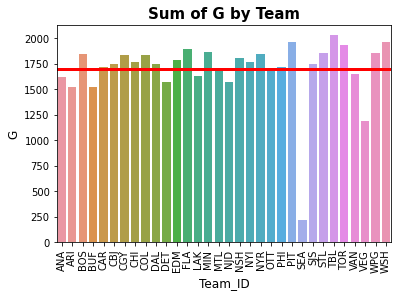

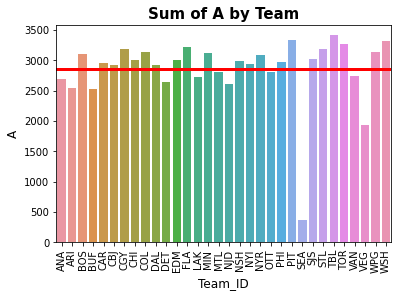

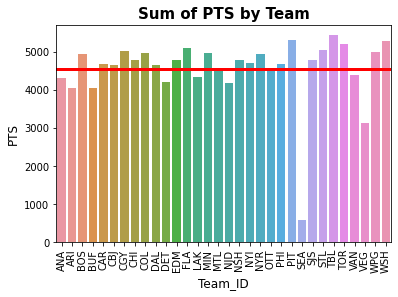

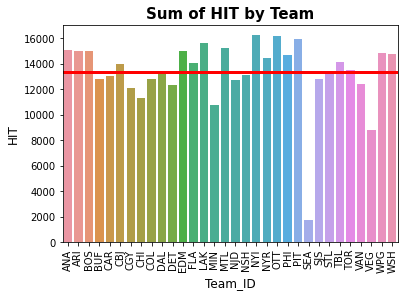

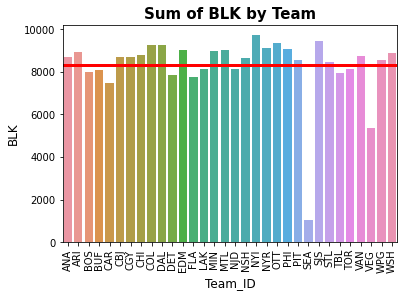

In [329]:
# Sum of Goals, Hits and Penalty minutes per team during the last 7 seasons.
cols = ["G", "A", "PTS", "HIT","BLK"]
for s in cols:
    sns.barplot(x="Team_ID", y=s, data=data.sort_values(by="Team_ID"), estimator=sum, ci=False)
    plt.title("Sum of " + s + " by Team", fontsize=15, fontweight="bold")
    plt.xlabel("Team_ID", fontsize=12)
    plt.ylabel(s, fontsize=12)
    plt.axhline(data[s].sum()/(len(data["Team_ID"].unique())),0,1, c="red", linewidth=3)
    plt.xticks(rotation=90)
    plt.show()

In [330]:
# Top 5/Bottom 5 teams per Goals, Hits and Blocked shots.
cols = ["G","A","PTS","HIT","BLK"]
for s in cols:
    print("Most " + s + " overall:")
    print(data.groupby("Team_ID").agg({s:"sum"}).sort_values(by=s, ascending=False).head(5), "\n")
    print("Least " + s + " overall:")
    print(data.groupby("Team_ID").agg({s:"sum"}).sort_values(by=s, ascending=True).head(5), "\n")

Most G overall:
            G
Team_ID      
TBL      2026
WSH      1966
PIT      1959
TOR      1935
FLA      1895 

Least G overall:
            G
Team_ID      
SEA       213
VEG      1185
ARI      1520
BUF      1522
DET      1567 

Most A overall:
            A
Team_ID      
TBL      3415
PIT      3342
WSH      3325
TOR      3267
FLA      3216 

Least A overall:
            A
Team_ID      
SEA       364
VEG      1938
BUF      2521
ARI      2535
NJD      2606 

Most PTS overall:
          PTS
Team_ID      
TBL      5441
PIT      5301
WSH      5291
TOR      5202
FLA      5111 

Least PTS overall:
          PTS
Team_ID      
SEA       577
VEG      3123
BUF      4043
ARI      4055
NJD      4179 

Most HIT overall:
             HIT
Team_ID         
NYI      16253.0
OTT      16191.0
PIT      15939.0
LAK      15608.0
MTL      15221.0 

Least HIT overall:
             HIT
Team_ID         
SEA       1768.0
VEG       8783.0
MIN      10798.0
CHI      11349.0
CGY      12089.0 

Most BLK overall:


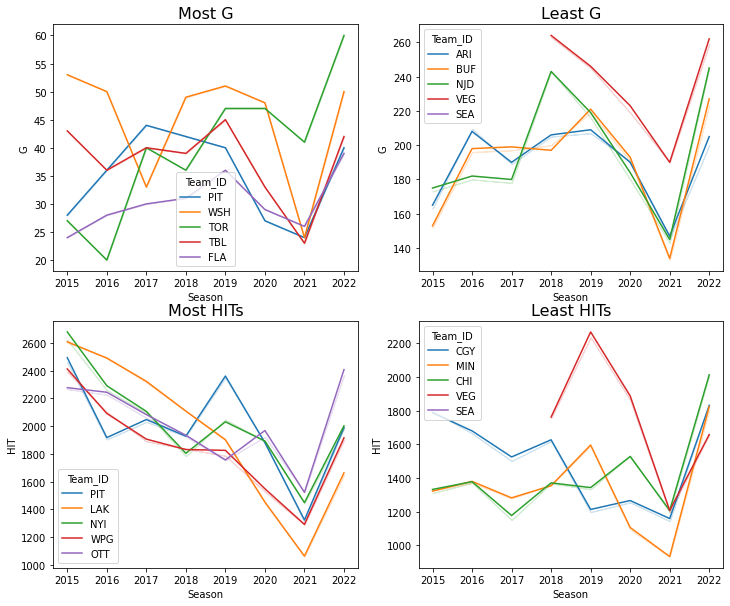

In [331]:
# Displaying some of the achieved stats using subplot.
fig, axes = plt.subplots(2,2, figsize=(12,10))
ax1 = sns.lineplot(x="Season", y="G", data=data[data["Team_ID"].isin(["TBL","WSH","TOR","PIT","FLA"])], hue="Team_ID", ci=False, estimator=max, ax=axes[0,0])
ax1.set_title("Most G", fontsize=16)
ax2 = sns.lineplot(x="Season", y="G", data=data[data["Team_ID"].isin(["SEA", "VEG","ARI","BUF","NJD"])], hue="Team_ID", ci=False, estimator=sum, ax=axes[0,1])
ax2.set_title("Least G", fontsize=16)
ax3 = sns.lineplot(x="Season", y="HIT", data=data[data["Team_ID"].isin(["NYI","OTT","LAK","PIT","WPG"])], hue="Team_ID", ci=False, estimator=sum, ax=axes[1,0])
ax3.set_title("Most HITs", fontsize=16)
ax4 = sns.lineplot(x="Season", y="HIT", data=data[data["Team_ID"].isin(["SEA","VEG","MIN","CHI","CGY"])], hue="Team_ID", ci=False, estimator=sum,ax=axes[1,1])
ax4.set_title("Least HITs", fontsize=16)
plt.show()

In [332]:
# Top 5 players in their respective best season in Goals scored, Assists, Total Points, Hits, and Blocks.
cols = ["G","A","PTS","HIT","BLK"]
for s in cols:
    print("Most " + s + " in one season had:")
    print(data.groupby(["Player_Name", "Season"]).agg({s:"max"}).sort_values(by=s, ascending=False).head(6), "\n")

Most G in one season had:
                         G
Player_Name     Season    
Auston Matthews 2022    60
Leon Draisaitl  2022    55
Alex Ovechkin   2015    53
Chris Kreider   2022    52
Alex Ovechkin   2019    51
                2016    50 

Most A in one season had:
                            A
Player_Name        Season    
Nikita Kucherov    2019    87
Jonathan Huberdeau 2022    85
Connor McDavid     2022    79
Johnny Gaudreau    2022    75
Connor McDavid     2019    75
Artemi Panarin     2022    74 

Most PTS in one season had:
                           PTS
Player_Name        Season     
Nikita Kucherov    2019    128
Connor McDavid     2022    123
                   2019    116
Jonathan Huberdeau 2022    115
Johnny Gaudreau    2022    115
Patrick Kane       2019    110 

Most HIT in one season had:
                          HIT
Player_Name     Season       
Matt Martin     2015    382.0
                2016    365.0
Mark Borowiecki 2017    364.0
Radko Gudas     2022    355.0
Ca

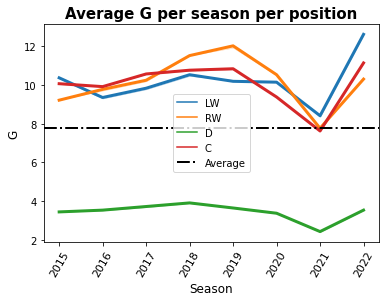

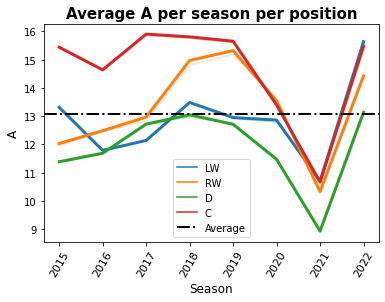

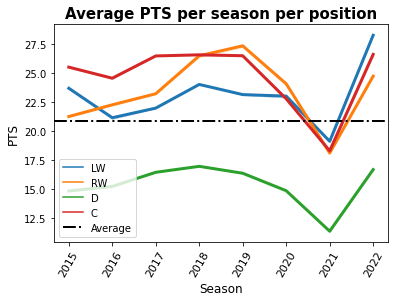

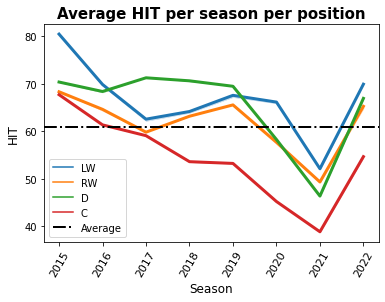

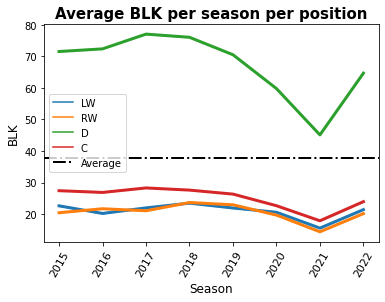

In [333]:
# Displaying Average Goals scored, Hits and Blocked shots per position (LW, RW, C, D) with overall Average across all positions.
for s in cols:
    sns.lineplot(x="Season", y=s, data=data[data["Pos"].isin(["D","C","LW","RW"])], hue="Pos", ci=False, linewidth=3)
    plt.title("Average " + s + " per season per position", fontsize=15, fontweight="bold")
    plt.xlabel("Season", fontsize=12)
    plt.ylabel(s, fontsize=12)
    plt.xticks(rotation=60, fontsize=11)
    plt.axhline(data[s].mean(),0,1,linewidth=2, c="black", linestyle="-.", label="Average")
    plt.legend()
    plt.show()

In [334]:
# Teams with the most total points scored by their players during the last 7 seasons, sorted in descending order. Tampa Bay Lightning is first with 5441 points.
data.groupby("Team_ID")["PTS"].sum().sort_values(ascending=False).reset_index()

,Team_ID,PTS
0,TBL,5441
1,PIT,5301
2,WSH,5291
3,TOR,5202
4,FLA,5111
5,STL,5045
6,CGY,5017
7,WPG,4998
8,MIN,4981
9,COL,4972


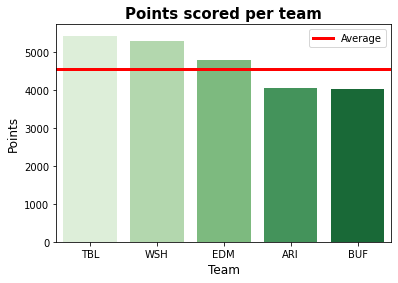

In [335]:
# Points scored per team in a barplot with 2 most best teams, 2 worst teams and 1 team that was in the middle of our list. (2 expansion teams excluded.)
sns.barplot(x="Team_ID", y="PTS", data=data[data["Team_ID"].isin(["TBL", "WSH", "EDM","ARI","BUF"])], estimator=sum, palette="Greens", ci=False, order=["TBL", "WSH", "EDM","ARI","BUF"])
plt.title("Points scored per team", fontsize=15, fontweight="bold")
plt.xlabel("Team", fontsize=12)
plt.ylabel("Points", fontsize=12)
plt.axhline(data["PTS"].sum()/(len(data["Team_ID"].unique())), linewidth=3, c="r", label="Average")
plt.legend()
plt.show()

In [336]:
# I want to know which players contributed the most to total points scored by Tampa Bay Lightning, Nikita Kucherov led them with 598 points.
data[data["Team_ID"] == "TBL"].groupby("Player_Name").agg({"PTS":"sum"}).sort_values(by="PTS", ascending=False).reset_index().head(5)

,Player_Name,PTS
0,Nikita Kucherov,598
1,Steven Stamkos,546
2,Victor Hedman,459
3,Brayden Point,368
4,Ondrej Palat,360


In [337]:
# Which players scored the most points during 1 season? Again, Nikita Kucherov is on the first place with 122 points in season 2019. Steven Stamkos scored the most goals, 42.
tbltop5seasons = data[["Player_Name", "Team_ID", "Pos", "G", "A", "PTS", "Avg_TOI", "Season"]][data["Team_ID"] == "TBL"].sort_values(by="PTS", ascending=False).reset_index().head(20)
tbltop5seasons

,index,Player_Name,Team_ID,Pos,G,A,PTS,Avg_TOI,Season
0,4204,Nikita Kucherov,TBL,RW,41,87,128,19:58,2019
1,7434,Steven Stamkos,TBL,C,42,64,106,18:29,2022
2,3235,Nikita Kucherov,TBL,RW,39,61,100,19:49,2018
3,4574,Steven Stamkos,TBL,C,45,53,98,18:18,2019
4,4437,Brayden Point,TBL,C,41,51,92,18:55,2019
5,3591,Steven Stamkos,TBL,C,27,59,86,18:46,2018
6,2312,Nikita Kucherov,TBL,RW,40,45,85,19:26,2017
7,5165,Nikita Kucherov,TBL,RW,33,52,85,18:52,2020
8,6923,Victor Hedman,TBL,D,20,65,85,25:05,2022
9,2209,Victor Hedman,TBL,D,16,56,72,24:30,2017


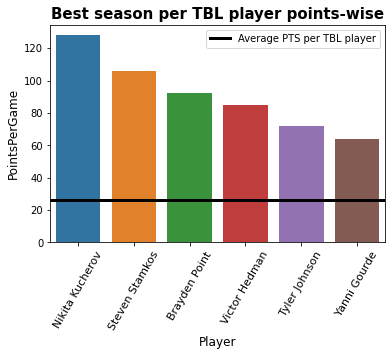

In [338]:
# 5 best players of the last 7 seasons in TBL uniform and their respecitve best seasons points-wise.
sns.barplot(x="Player_Name",y="PTS",data=tbltop5seasons, estimator=max, ci=False)
plt.title("Best season per TBL player points-wise", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("PointsPerGame", fontsize=12)
plt.xticks(rotation=60, fontsize=11)
plt.axhline(data["PTS"][data["Team_ID"] == "TBL"].mean(),0,1,linewidth=3, c="black", label="Average PTS per TBL player")
plt.legend()
plt.show()

In [339]:
# Listing top 10 forwards in the last 7 seasons based on their Points total.
ptsoverall = data[data["Pos"].isin(["LW","RW","C","W","F"])].groupby(["Player_Name","Team_ID"]).agg({"GP":"sum","G":"sum","A":"sum","PTS":"sum"}).sort_values(by="PTS", ascending=False).head(10).reset_index()
ptsoverall["PointsPerGame"] = (ptsoverall["PTS"])/(ptsoverall["GP"])
ptsoverall

,Player_Name,Team_ID,GP,G,A,PTS,PointsPerGame
0,Connor McDavid,EDM,487.0,239,458,697,1.431211
1,Patrick Kane,CHI,592.0,252,435,687,1.160473
2,Sidney Crosby,PIT,558.0,243,397,640,1.146953
3,Leon Draisaitl,EDM,558.0,254,362,616,1.103943
4,Brad Marchand,BOS,574.0,259,350,609,1.060976
5,Johnny Gaudreau,CGY,601.0,209,399,608,1.011647
6,Nikita Kucherov,TBL,510.0,237,361,598,1.172549
7,Alex Ovechkin,WSH,595.0,358,238,596,1.001681
8,Nathan MacKinnon,COL,556.0,218,367,585,1.052158
9,Blake Wheeler,WPG,592.0,175,391,566,0.956081


In [340]:
# Listing top 10 defensemen in the last 7 seasons based on their Points total.
ptsdmen = data[data["Pos"] == "D"].groupby(["Player_Name","Team_ID"]).agg({"GP":"sum","G":"sum","A":"sum","PTS":"sum"}).sort_values(by="PTS", ascending=False).head(10).reset_index()
ptsdmen["PointsPerGame"] = (ptsdmen["PTS"])/(ptsdmen["GP"])
ptsdmen

,Player_Name,Team_ID,GP,G,A,PTS,PointsPerGame
0,Brent Burns,SJS,618.0,130,359,489,0.791262
1,Roman Josi,NSH,588.0,117,351,468,0.795918
2,Victor Hedman,TBL,565.0,105,354,459,0.812389
3,John Carlson,WSH,571.0,99,360,459,0.803853
4,Kris Letang,PIT,519.0,89,330,419,0.807322
5,John Klingberg,DAL,552.0,71,303,374,0.677536
6,Drew Doughty,LAK,572.0,73,273,346,0.604895
7,Morgan Rielly,TOR,581.0,67,279,346,0.595525
8,Mark Giordano,CGY,500.0,88,224,312,0.624000
9,Torey Krug,BOS,441.0,53,242,295,0.668934


In [341]:
# Concatenate both datasets into one.
ptsall = pd.concat([ptsoverall,ptsdmen],ignore_index=True)
ptsall.sort_values(by="PTS", ascending=False)


,Player_Name,Team_ID,GP,G,A,PTS,PointsPerGame
0,Connor McDavid,EDM,487.0,239,458,697,1.431211
1,Patrick Kane,CHI,592.0,252,435,687,1.160473
2,Sidney Crosby,PIT,558.0,243,397,640,1.146953
3,Leon Draisaitl,EDM,558.0,254,362,616,1.103943
4,Brad Marchand,BOS,574.0,259,350,609,1.060976
5,Johnny Gaudreau,CGY,601.0,209,399,608,1.011647
6,Nikita Kucherov,TBL,510.0,237,361,598,1.172549
7,Alex Ovechkin,WSH,595.0,358,238,596,1.001681
8,Nathan MacKinnon,COL,556.0,218,367,585,1.052158
9,Blake Wheeler,WPG,592.0,175,391,566,0.956081


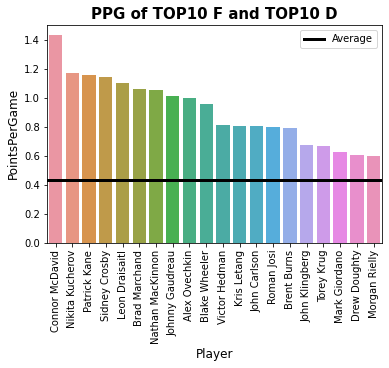

In [342]:
sns.barplot(x="Player_Name",y="PointsPerGame",data=ptsall.sort_values(by="PointsPerGame", ascending=False))
plt.title("PPG of TOP10 F and TOP10 D", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("PointsPerGame", fontsize=12)
plt.axhline((data["PTS"]).sum()/(data["GP"]).sum(), linewidth=3, color="black", label="Average")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [343]:
hits = data.groupby(["Player_Name","Team_ID"]).agg({"GP":"sum","HIT":"sum"}).sort_values(by="HIT", ascending=False).head(10).reset_index()
hits["HitsPerGame"] = hits["HIT"]/hits["GP"]
hits

,Player_Name,Team_ID,GP,HIT,HitsPerGame
0,Cal Clutterbuck,NYI,514.0,1835.0,3.570039
1,Tom Wilson,WSH,565.0,1745.0,3.088496
2,Matt Martin,NYI,405.0,1680.0,4.148148
3,Adam Lowry,WPG,539.0,1535.0,2.847866
4,Mark Borowiecki,OTT,354.0,1505.0,4.251412
5,Alex Ovechkin,WSH,595.0,1500.0,2.521008
6,Dustin Brown,LAK,576.0,1313.0,2.279514
7,Rasmus Ristolainen,BUF,508.0,1289.0,2.537402
8,Jordan Staal,CAR,531.0,1188.0,2.237288
9,Nick Foligno,CBJ,484.0,1180.0,2.438017


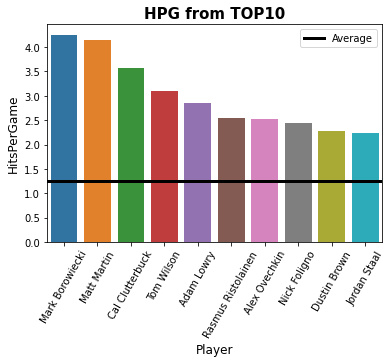

In [344]:
sns.barplot(x="Player_Name",y="HitsPerGame",data=hits.sort_values(by="HitsPerGame", ascending=False))
plt.title("HPG from TOP10", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("HitsPerGame", fontsize=12)
plt.axhline((data["HIT"]).sum()/(data["GP"]).sum(), linewidth=3, color="black", label="Average")
plt.xticks(rotation=60)
plt.legend()
plt.show()

<Figure size 864x720 with 0 Axes>

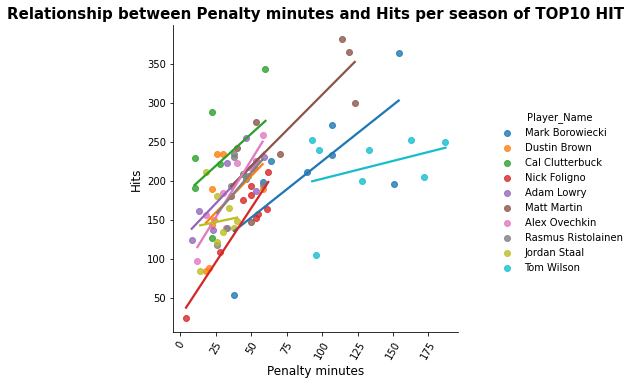

In [345]:
plt.figure(figsize=(12,10))
sns.lmplot(x="PIM",y="HIT", data=data[data["Player_Name"].isin(hits1)], hue="Player_Name", ci=False)
plt.title("Relationship between Penalty minutes and Hits per season of TOP10 HIT", fontsize=15, fontweight="bold")
plt.xlabel("Penalty minutes", fontsize=12)
plt.ylabel("Hits", fontsize=12)
plt.xticks(rotation=60)
plt.show()


In [346]:
blks = data.groupby(["Player_Name","Team_ID"]).agg({"GP":"sum","BLK":"sum"}).sort_values(by="BLK", ascending=False).head(10).reset_index()
blks["BlocksPerGame"] = hits["HIT"]/hits["GP"]
blks

,Player_Name,Team_ID,GP,BLK,BlocksPerGame
0,Roman Josi,NSH,588.0,1101.0,3.570039
1,Mark Giordano,CGY,500.0,1068.0,3.088496
2,John Carlson,WSH,571.0,1040.0,4.148148
3,Alexander Edler,VAN,431.0,1019.0,2.847866
4,Brent Burns,SJS,618.0,1011.0,4.251412
5,Andy Greene,NJD,446.0,983.0,2.521008
6,Jared Spurgeon,MIN,543.0,980.0,2.279514
7,Jonas Brodin,MIN,557.0,938.0,2.537402
8,Erik Johnson,COL,444.0,931.0,2.237288
9,Marc-Edouard Vlasic,SJS,561.0,924.0,2.438017


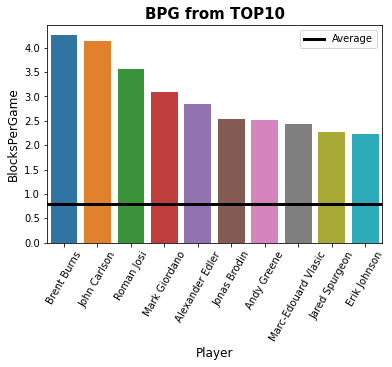

In [347]:
sns.barplot(x="Player_Name",y="BlocksPerGame",data=blks.sort_values(by="BlocksPerGame", ascending=False))
plt.title("BPG from TOP10", fontsize=15, fontweight="bold")
plt.xlabel("Player", fontsize=12)
plt.ylabel("BlocksPerGame", fontsize=12)
plt.axhline((data["BLK"]).sum()/(data["GP"]).sum(), linewidth=3, color="black", label="Average")
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [348]:
# I want to look more closely on some of the best defensemen that played in this time span. Namely Kris Letang, John Carlson and Roman Josi.
dmen = data[data["Player_Name"].isin(["Kris Letang", "John Carlson", "Roman Josi"])].groupby(["Player_Name", "Team_ID"]).agg({"G":["min","max","mean"],"A":["min","max","mean"],"PTS":["min","max","mean"], "GP":"mean"}).reset_index()
dmenunique = dmen["Player_Name"].unique()
dmen.columns = dmen.columns.map("_".join)
dmen

,Player_Name_,Team_ID_,G_min,G_max,G_mean,A_min,A_max,A_mean,PTS_min,PTS_max,PTS_mean,GP_mean
0,John Carlson,WSH,8,17,12.375,28,60,45.000,37,75,57.375,71.375
1,Kris Letang,PIT,5,16,11.125,29,58,41.250,34,68,52.375,64.875
2,Roman Josi,NSH,8,23,14.625,25,73,43.875,33,96,58.500,73.500


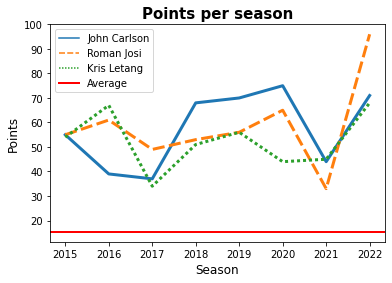

In [349]:
# Points per season of the 3 defensemen from the previous table in a linegraph. Roman Josi and Kris Letang had their career years in the last season.
sns.lineplot(x="Season", y="PTS", hue="Player_Name", data=data[data["Player_Name"].isin(dmenunique)], style="Player_Name", linewidth=3)
plt.title("Points per season", fontsize=15, fontweight="bold")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Points", fontsize=12)
plt.axhline(data["PTS"][data["Pos"] == "D"].mean(),0,1,linewidth=2, c="r", label="Average")
plt.legend(fontsize=10)
plt.show()


In [405]:
# Creating a new Shooting percentage column.
data["S_Pct"] = (data["G"]/data["S"])*100
data["S_Pct"].dtype
print("Average shooting percentage is: ",data["S_Pct"].mean())

Average shooting percentage is:  7.967930416025112


In [427]:
data["S_Pct"][data["Player_Name"] == "Mikael Backlund"]

21       9.708738
955     13.548387
1894    11.167513
2796     6.542056
3740    10.243902
4720    10.191083
5637     6.250000
6562     5.607477
Name: S_Pct, dtype: float64

In [477]:
# Displaying 10 players with the highest shooting percentage, while having more than 100 shots in the season 2022
bestsc = data[["Player_Name","Season","S","S_Pct","G"]][(data["S"] > 100) & (data["Season"] == 2022)].sort_values(by="S_Pct", ascending=False).head(10)
bestsc

,Player_Name,Season,S,S_Pct,G
6569,Ivan Barbashev,2022,111.0,23.423423,26
6973,Ryan Johansen,2022,118.0,22.033898,26
7223,Brock Nelson,2022,171.0,21.637427,37
7379,Brayden Schenn,2022,111.0,21.621622,24
7232,Joshua Norris,2022,172.0,20.348837,35
7040,Chris Kreider,2022,258.0,20.155039,52
7071,Gabriel Landeskog,2022,150.0,20.000000,30
6774,Leon Draisaitl,2022,278.0,19.784173,55
6966,Tanner Jeannot,2022,124.0,19.354839,24
7479,Troy Terry,2022,192.0,19.270833,37


In [475]:
# Displaying their career averages for comparison.
bestscuni = bestsc["Player_Name"].unique()
for w in bestscuni:
    print(w)
    wavg = data["S_Pct"][data["Player_Name"] == w].mean()
    print(wavg)

Ivan Barbashev
18.934480992620525
Ryan Johansen
11.699207886638625
Brock Nelson
14.59943233030105
Brayden Schenn
14.764019981303715
Joshua Norris
19.02858527131783
Chris Kreider
15.096030875636027
Gabriel Landeskog
13.53397835153154
Leon Draisaitl
15.965094486834229
Tanner Jeannot
20.546984572230016
Troy Terry
12.723803231089935


In [478]:
# Displaying 10 players with the lowest shooting percentage while having more than 200 shots in the 2022 season.
worstsc = data[["Player_Name","Season","S","S_Pct","G"]][(data["S"] > 200) & (data["Season"] == 2022) & (data["Pos"].isin(["LW","RW","C","W","F"]))].sort_values(by="S_Pct", ascending=True).head(10)
worstsc

,Player_Name,Season,S,S_Pct,G
6562,Mikael Backlund,2022,214.0,5.607477,12
7033,Travis Konecny,2022,220.0,7.272727,16
6714,Blake Coleman,2022,212.0,7.547170,16
7348,Evan Rodrigues,2022,243.0,7.818930,19
6956,Alex Iafallo,2022,215.0,7.906977,17
7200,Trevor Moore,2022,202.0,8.415842,17
6601,Patrice Bergeron,2022,293.0,8.532423,25
6550,Viktor Arvidsson,2022,227.0,8.810573,20
7034,Anze Kopitar,2022,210.0,9.047619,19
7004,Patrick Kane,2022,287.0,9.059233,26


In [472]:
# Displaying their career averages for comparison.
worstscuni = worstsc["Player_Name"].unique()
for w in worstscuni:
    print(w)
    wavg = data["S_Pct"][data["Player_Name"] == w].mean()
    print(wavg)

Mikael Backlund
9.157394450382466
Travis Konecny
11.718469296818794
Blake Coleman
7.606009304944359
Evan Rodrigues
8.054879672234948
Alex Iafallo
9.601527240765112
Trevor Moore
10.115666499008942
Patrice Bergeron
11.696694373778158
Viktor Arvidsson
9.347240336179155
Anze Kopitar
12.660910018881811
Patrick Kane
11.68467322762161


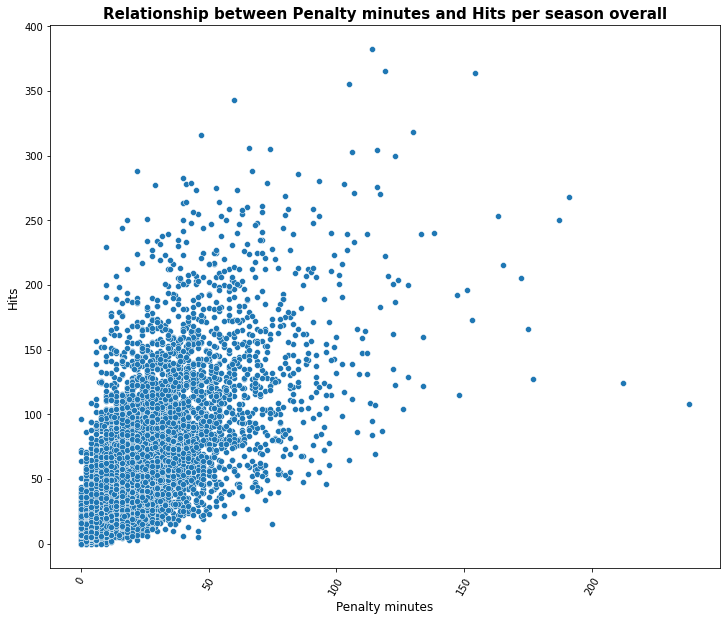

In [350]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="PIM",y="HIT", data=data)
plt.title("Relationship between Penalty minutes and Hits per season overall", fontsize=15, fontweight="bold")
plt.xlabel("Penalty minutes", fontsize=12)
plt.ylabel("Hits", fontsize=12)
plt.xticks(rotation=60)
plt.show()


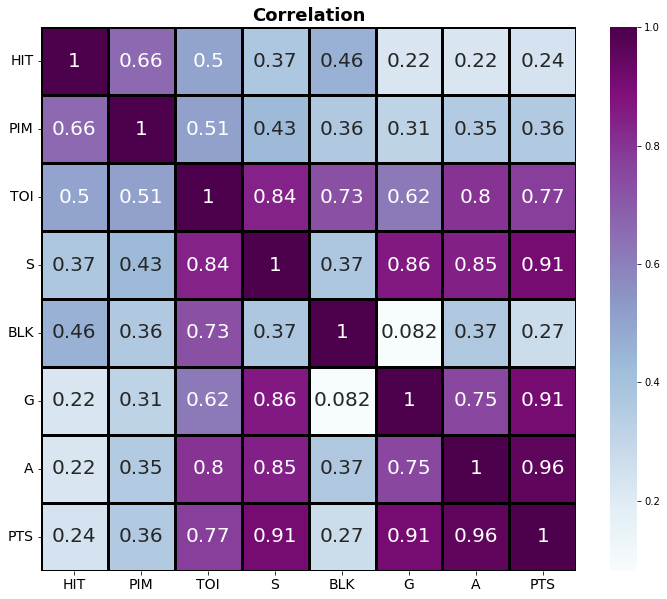

In [351]:
cori = data[["HIT","PIM","TOI","S","BLK", "G", "A", "PTS"]].corr(method="pearson")
plt.figure(figsize=(12,10))
sns.heatmap(cori, annot=True, annot_kws={"size":20}, cmap="BuPu", linewidths=3, linecolor="black")
plt.title("Correlation", fontsize=18, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.show()